In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [3]:
data_dir = "Dataset/NEW/12 Animal/raw-img"
class_names = os.listdir(data_dir)

class_names

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [4]:
# Image data generators

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Split data for training and validation

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir, 
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 20995 images belonging to 10 classes.
Found 5244 images belonging to 10 classes.


In [6]:
# Load pre-trained ResNet50 model

In [7]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [8]:
# Freeze base model layers

In [9]:
for layer in model.layers:
    layer.trainable = False

In [10]:
# Add custom classifier

In [11]:
animal_model = models.Sequential()
animal_model.add(model)
animal_model.add(layers.GlobalAveragePooling2D())
animal_model.add(layers.Dense(129, activation='relu'))
animal_model.add(layers.Dropout(0.5))
animal_model.add(layers.Dense(len(class_names), activation='softmax'))

In [12]:
# Compile the model

In [13]:
animal_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model

In [15]:
history = animal_model.fit(train_generator,
                           validation_data = validation_generator,
                           epochs=1)

C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


657/657 ━━━━━━━━━━━━━━━━━━━━ 3643s 6s/step - accuracy: 0.2025 - loss: 2.2301 - val_accuracy: 0.2853 - val_loss: 2.0789


In [16]:
# Optionally, fine-tune more layers
# Unfreeze the last few layers of the base model

In [18]:
for layer in model.layers[-20:]:
    layer.trainable = True

In [ ]:
# Recompile the model after changes

In [19]:
animal_model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history_fine = animal_model.fit(train_generator, 
                         validation_data=validation_generator, 
                         epochs=1)

657/657 ━━━━━━━━━━━━━━━━━━━━ 4065s 6s/step - accuracy: 0.2600 - loss: 2.2416 - val_accuracy: 0.3831 - val_loss: 1.7387


In [ ]:
# Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


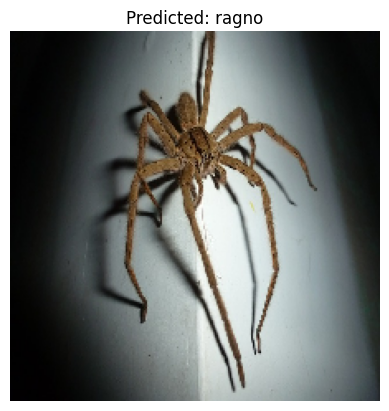

In [21]:
def prediction(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr /= 255.0

    predictions = animal_model.predict(img_arr)
    predicted_class = class_names[np.argmax(predictions[0])]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

test_image_path = 'Dataset/NEW/12 Animal/raw-img/ragno/e83cb2082bfd013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg'
prediction(test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


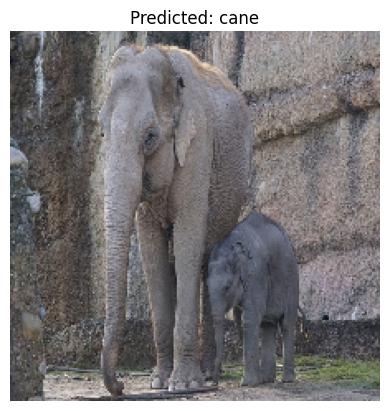

In [23]:
test_image_path = 'Dataset/NEW/12 Animal/raw-img/elefante/e133b10d2bf21c22d2524518b7444f92e37fe5d404b0144390f8c07aa4e5b0_640.jpg'
prediction(test_image_path)